In [ ]:
import pandas as pd
import csv
import numpy as np


## EDA and Causal Diagram

Reading the tweets from the data set with engineered semantic features.

In [ ]:
df = pd.read_csv("topic-semantic.csv",index_col=None)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'clean', 'content', 'tokenize1', 'ID',
       'AUTHOR', 'RETWEET', 'LIKES', 'QUOTE COUNT', 'REPLY COUNT', 'emojis',
       'len', 'num_mentions', 'num_hashtags', 'num_links', 'JJ', 'NN', 'VBD',
       'RB', 'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN',
       'clean_sentence', 'sentiment', 'topic'],
      dtype='object')

Considering only the attributes with numeric data.

In [ ]:
df = df[['RETWEET','topic','emojis','num_mentions','num_hashtags','num_links','len','sentiment','JJ', 'NN', 'VBD', 'RB','IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN']]

Installing the dowhy python library for causal modelling

In [ ]:
!pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.1 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main 

In [ ]:
from dowhy import CausalModel

Creating the causal graph based on the graph produced by the PC causal learn library.

In [ ]:
causal_graph = """
digraph{
  VBG -> VBZ;
  VBG -> len;
  VBG -> VBN;
  VBG -> NN;
  VBG -> JJ;
  num_mentions -> PRP;
  num_mentions -> num_links;
  num_mentions -> emojis;
  PRP -> num_hashtags;
  PRP -> NNS;
  PRP -> VBP;
  PRP -> num_links;
  PRP -> VB;  
RB -> num_hashtags;
RB -> num_links;
  RB -> JJ;
   RB -> DT;
  RB -> len;
  RB -> NNS;
  VBZ -> len;
  VBZ -> NNS;
  VBP -> len;
  VBP -> NNS;
  VB -> len;
  VB -> NN;
  VB -> CC;
  VB -> emojis;
  IN -> len;
  IN -> VB;
  IN -> CC;
  IN -> JJ;
  IN -> num_links;
  NNS -> len;
  VBD -> len;
  VBD -> JJ;
  VBD -> num_hashtags;
  VBD -> NN;
  VBD -> num_links;
  CC -> len;
  CC -> JJ;
  CC -> NN;
  len -> DT;
  DT -> VBN;
  DT -> JJ;
  DT -> NN;
  sentiment -> VBN;
  sentiment -> num_hashtags;
  sentiment -> emojis;
  VBN -> num_hashtags;
  VBN -> JJ;
  VBN -> NN;
  NN -> num_hashtags;
  NN -> emojis;
  NN -> num_links;
  num_links -> num_hashtags;
  num_links -> emojis;
  num_hashtags -> emojis;
  num_hashtags -> topic;
  topic -> RETWEET;
}
"""

Here, we are creating causal models for each non-outcome attribute. For each model we provide the data set and the causal graph as input. The number of retweets always serves as the outcome variable whereas the treatment variable changes. We create a model where each non-outcome attribute is set as the treatment variable.

In [ ]:
model = CausalModel(
    data=df,
    treatment=['VBG'],
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
    

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


In [ ]:
import dowhy.datasets, dowhy.plotter

We use backdoor linear regression to estimate the effect of each attribute on the number of tweets since we are dealing with attributes with continuous numeric values. Here, we are creating a causal model where VBG is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VBG on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                         
──────(Expectation(RETWEET))
d[VBG]                      
Estimand assumption 1, Unconfoundedness: If U→{VBG} and U→RETWEET then P(RETWEET|VBG,,U) = P(RETWEET|VBG,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
G]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VBG to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VBG} and U→{num_hashtags} then P(num_hashtags|VBG,U) = P(num_hashtags|VBG)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VBG, U) = P(RETWEET|num_hashtags, VBG)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'e

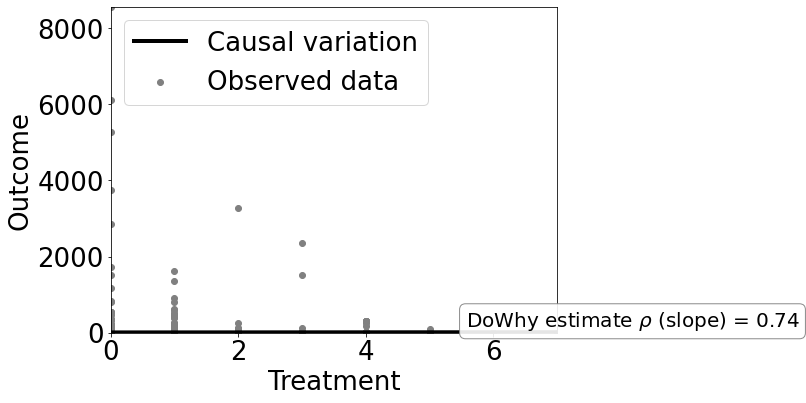

In [ ]:
model_VBG = CausalModel(
    data=df,
    treatment='VBG',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VBG = model_VBG.identify_effect()
print(estimands_VBG)
estimate_VBG = model_VBG.estimate_effect(estimands_VBG,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VBG.value))
dowhy.plotter.plot_causal_effect(estimate_VBG, df['VBG'], df['RETWEET'])

Here, we are creating a causal model where the number of mentions is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the number of mentions on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                             
──────────────(Expectation(RETWEET))
d[numₘₑₙₜᵢₒₙₛ]                      
Estimand assumption 1, Unconfoundedness: If U→{num_mentions} and U→RETWEET then P(RETWEET|num_mentions,,U) = P(RETWEET|num_mentions,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [nu
m_mentions]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from num_mentions to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{num_mentions} and U→{num_hashtags} then P(num_hashtags|num_mentions,U) = P(num_hashtags|num_mentions)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, num_mentions, U) = P(RETWEET|num_h

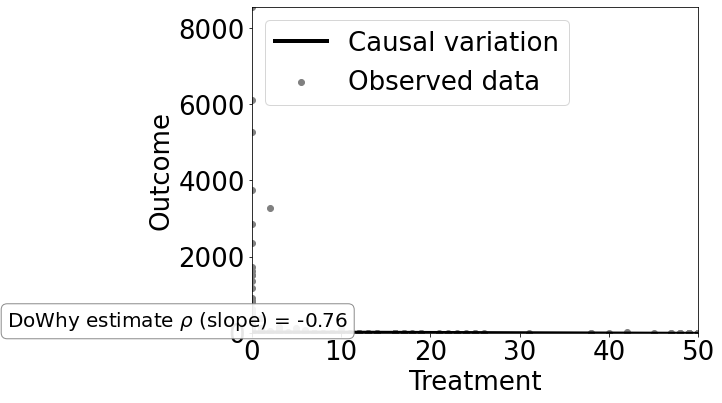

In [ ]:
model_mentions = CausalModel(
    data=df,
    treatment='num_mentions',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_mentions = model_mentions.identify_effect()
print(estimands_mentions)
estimate_mentions = model_mentions.estimate_effect(estimands_mentions,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_mentions.value))
dowhy.plotter.plot_causal_effect(estimate_mentions, df['num_mentions'], df['RETWEET'])


Here, we are creating a causal model where PRP is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of PRP on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                      
──────(Expectation(RETWEET|num_mentions))
d[PRP]                                   
Estimand assumption 1, Unconfoundedness: If U→{PRP} and U→RETWEET then P(RETWEET|PRP,num_mentions,U) = P(RETWEET|PRP,num_mentions)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [PR
P]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from PRP to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{PRP} and U→{num_hashtags} then P(num_hashtags|PRP,U) = P(num_hashtags|PRP)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, PRP, U) = P(RETWEET|num_hashtags, PRP)

linear_regression
{'control

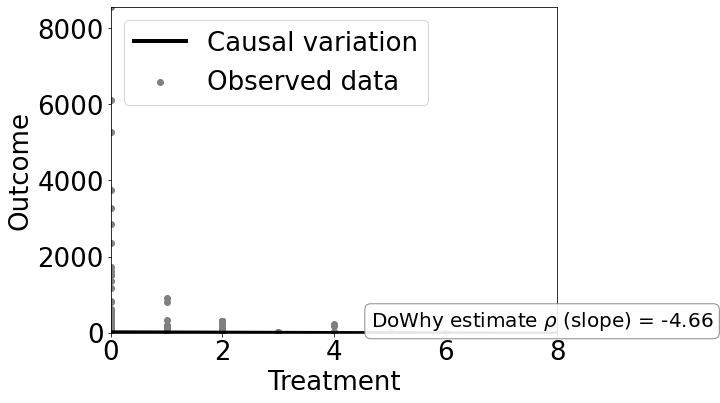

In [ ]:
model_PRP = CausalModel(
    data=df,
    treatment='PRP',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_PRP = model_PRP.identify_effect()
print(estimands_PRP)
estimate_PRP = model_PRP.estimate_effect(estimands_PRP,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_PRP.value))
dowhy.plotter.plot_causal_effect(estimate_PRP, df['PRP'], df['RETWEET'])

Here, we are creating a causal model where RB is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of RB on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                        
─────(Expectation(RETWEET))
d[RB]                      
Estimand assumption 1, Unconfoundedness: If U→{RB} and U→RETWEET then P(RETWEET|RB,,U) = P(RETWEET|RB,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [RB
]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from RB to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{RB} and U→{num_hashtags} then P(num_hashtags|RB,U) = P(num_hashtags|RB)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, RB, U) = P(RETWEET|num_hashtags, RB)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effec

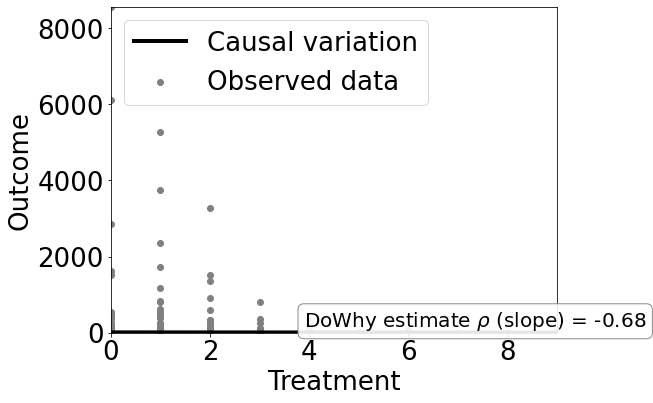

In [ ]:
model_RB = CausalModel(
    data=df,
    treatment='RB',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_RB = model_RB.identify_effect()
print(estimands_RB)
estimate_RB = model_RB.estimate_effect(estimands_RB,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_RB.value))
dowhy.plotter.plot_causal_effect(estimate_RB, df['RB'], df['RETWEET'])

Here, we are creating a causal model where VBZ is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VBZ on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                             
──────(Expectation(RETWEET|VBG))
d[VBZ]                          
Estimand assumption 1, Unconfoundedness: If U→{VBZ} and U→RETWEET then P(RETWEET|VBZ,VBG,U) = P(RETWEET|VBZ,VBG)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
Z]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VBZ to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VBZ} and U→{num_hashtags} then P(num_hashtags|VBZ,U) = P(num_hashtags|VBZ)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VBZ, U) = P(RETWEET|num_hashtags, VBZ)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_signi

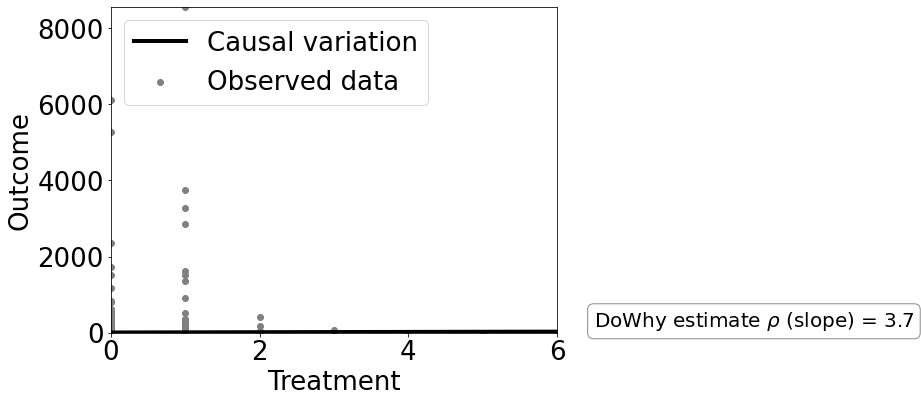

In [ ]:
model_VBZ = CausalModel(
    data=df,
    treatment='VBZ',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VBZ = model_VBZ.identify_effect()
print(estimands_VBZ)
estimate_VBZ = model_VBZ.estimate_effect(estimands_VBZ,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VBZ.value))
dowhy.plotter.plot_causal_effect(estimate_VBZ, df['VBZ'], df['RETWEET'])

Here, we are creating a causal model where VBp is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VBP on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                             
──────(Expectation(RETWEET|PRP))
d[VBP]                          
Estimand assumption 1, Unconfoundedness: If U→{VBP} and U→RETWEET then P(RETWEET|VBP,PRP,U) = P(RETWEET|VBP,PRP)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
P]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VBP to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VBP} and U→{num_hashtags} then P(num_hashtags|VBP,U) = P(num_hashtags|VBP)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VBP, U) = P(RETWEET|num_hashtags, VBP)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_signi

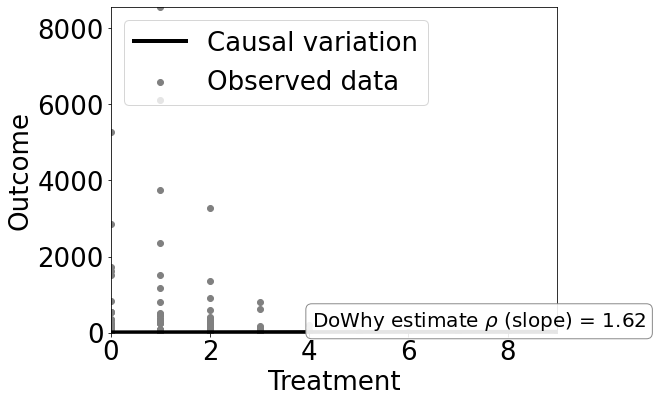

In [ ]:
model_VBP = CausalModel(
    data=df,
    treatment='VBP',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VBP = model_VBP.identify_effect()
print(estimands_VBP)
estimate_VBP = model_VBP.estimate_effect(estimands_VBP,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VBP.value))
dowhy.plotter.plot_causal_effect(estimate_VBP, df['VBP'], df['RETWEET'])

Here, we are creating a causal model where VB is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VB on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                               
─────(Expectation(RETWEET|PRP,IN))
d[VB]                             
Estimand assumption 1, Unconfoundedness: If U→{VB} and U→RETWEET then P(RETWEET|VB,PRP,IN,U) = P(RETWEET|VB,PRP,IN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VB to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VB} and U→{num_hashtags} then P(num_hashtags|VB,U) = P(num_hashtags|VB)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VB, U) = P(RETWEET|num_hashtags, VB)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_sig

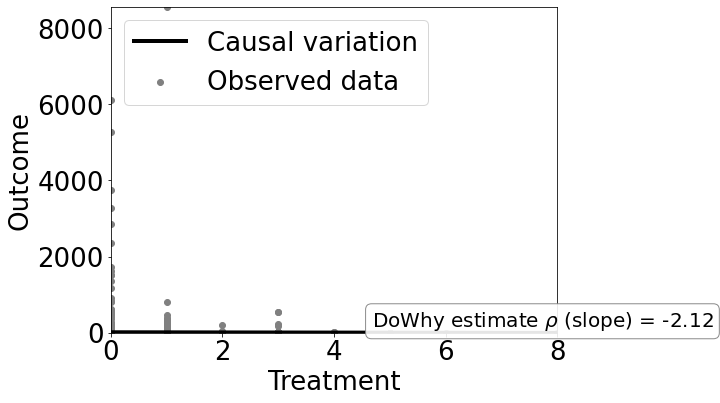

In [ ]:
model_VB = CausalModel(
    data=df,
    treatment='VB',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VB = model_VB.identify_effect()
print(estimands_VB)
estimate_VB = model_VB.estimate_effect(estimands_VB,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VB.value))
dowhy.plotter.plot_causal_effect(estimate_VB, df['VB'], df['RETWEET'])

Here, we are creating a causal model where IN is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of IN on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                        
─────(Expectation(RETWEET))
d[IN]                      
Estimand assumption 1, Unconfoundedness: If U→{IN} and U→RETWEET then P(RETWEET|IN,,U) = P(RETWEET|IN,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [IN
]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from IN to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{IN} and U→{num_hashtags} then P(num_hashtags|IN,U) = P(num_hashtags|IN)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, IN, U) = P(RETWEET|num_hashtags, IN)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effec

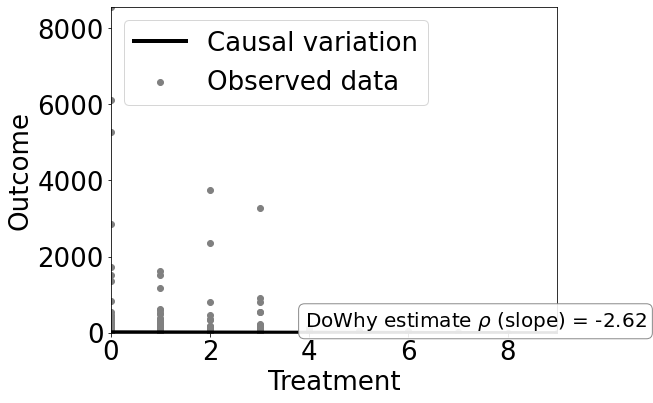

In [ ]:
model_IN = CausalModel(
    data=df,
    treatment='IN',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_IN = model_IN.identify_effect()
print(estimands_IN)
estimate_IN = model_IN.estimate_effect(estimands_IN,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_IN.value))
dowhy.plotter.plot_causal_effect(estimate_IN, df['IN'], df['RETWEET'])

Here, we are creating a causal model where NNS is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of NNS on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                        
──────(Expectation(RETWEET|PRP,VBP,RB,VBZ))
d[NNS]                                     
Estimand assumption 1, Unconfoundedness: If U→{NNS} and U→RETWEET then P(RETWEET|NNS,PRP,VBP,RB,VBZ,U) = P(RETWEET|NNS,PRP,VBP,RB,VBZ)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [NN
S]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from NNS to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{NNS} and U→{num_hashtags} then P(num_hashtags|NNS,U) = P(num_hashtags|NNS)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, NNS, U) = P(RETWEET|num_hashtags, NNS)

linear_regression

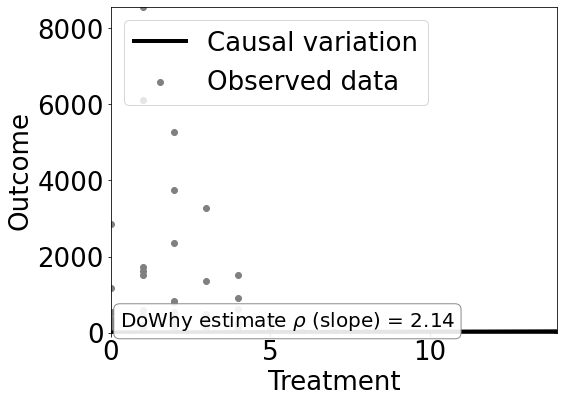

In [ ]:
model_NNS = CausalModel(
    data=df,
    treatment='NNS',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_NNS = model_NNS.identify_effect()
print(estimands_NNS)
estimate_NNS= model_NNS.estimate_effect(estimands_NNS,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_NNS.value))
dowhy.plotter.plot_causal_effect(estimate_NNS, df['NNS'], df['RETWEET'])

Here, we are creating a causal model where VBD is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VBD on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                         
──────(Expectation(RETWEET))
d[VBD]                      
Estimand assumption 1, Unconfoundedness: If U→{VBD} and U→RETWEET then P(RETWEET|VBD,,U) = P(RETWEET|VBD,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
D]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VBD to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VBD} and U→{num_hashtags} then P(num_hashtags|VBD,U) = P(num_hashtags|VBD)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VBD, U) = P(RETWEET|num_hashtags, VBD)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'e

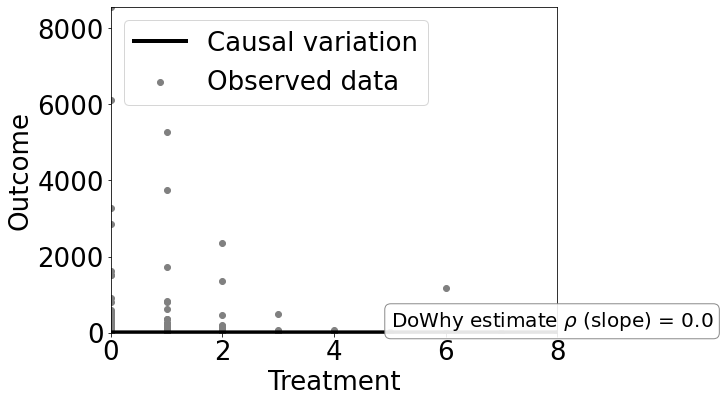

In [ ]:
model_VBD = CausalModel(
    data=df,
    treatment='VBD',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VBD = model_VBD.identify_effect()
print(estimands_VBD)
estimate_VBD = model_VBD.estimate_effect(estimands_VBD,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VBD.value))
dowhy.plotter.plot_causal_effect(estimate_VBD, df['VBD'], df['RETWEET'])

Here, we are creating a causal model where CC is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of CC on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                              
─────(Expectation(RETWEET|VB,IN))
d[CC]                            
Estimand assumption 1, Unconfoundedness: If U→{CC} and U→RETWEET then P(RETWEET|CC,VB,IN,U) = P(RETWEET|CC,VB,IN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [CC
]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from CC to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{CC} and U→{num_hashtags} then P(num_hashtags|CC,U) = P(num_hashtags|CC)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, CC, U) = P(RETWEET|num_hashtags, CC)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_signific

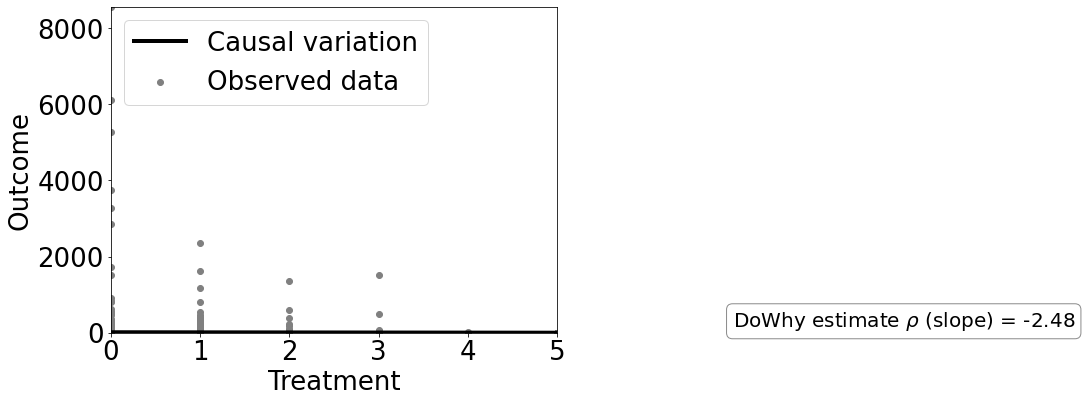

In [ ]:
model_CC = CausalModel(
    data=df,
    treatment='CC',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_CC = model_CC.identify_effect()
print(estimands_CC)
estimate_CC = model_CC.estimate_effect(estimands_CC,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_CC.value))
dowhy.plotter.plot_causal_effect(estimate_CC, df['CC'], df['RETWEET'])

Here, we are creating a causal model where the length of the tweet is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the length of the tweet on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                 
──────(Expectation(RETWEET|CC,PRP,VBD,VB,VBG,RB,IN))
d[len]                                              
Estimand assumption 1, Unconfoundedness: If U→{len} and U→RETWEET then P(RETWEET|len,CC,PRP,VBD,VB,VBG,RB,IN,U) = P(RETWEET|len,CC,PRP,VBD,VB,VBG,RB,IN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [le
n]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from len to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{len} and U→{num_hashtags} then P(num_hashtags|len,U) = P(num_hashtags|len)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, len, U) = P(

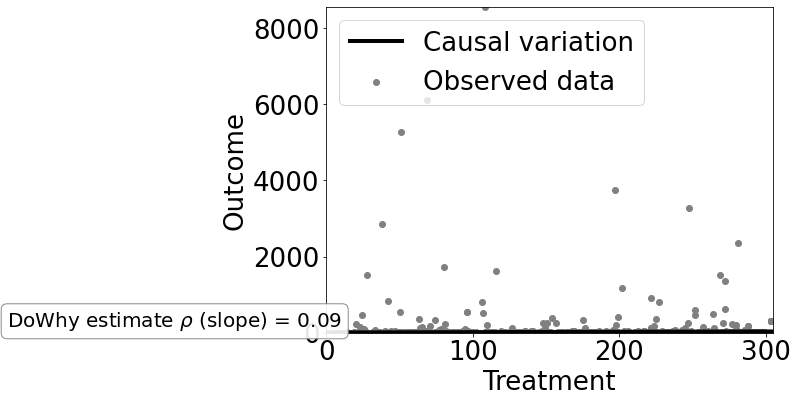

In [ ]:
model_len = CausalModel(
    data=df,
    treatment='len',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_len = model_len.identify_effect()
print(estimands_len)
estimate_len = model_len.estimate_effect(estimands_len,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_len.value))
dowhy.plotter.plot_causal_effect(estimate_len, df['len'], df['RETWEET'])

Here, we are creating a causal model where the sentiment of the tweet is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the sentiment of the tweet on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                            
────────────(Expectation(RETWEET))
d[sentiment]                      
Estimand assumption 1, Unconfoundedness: If U→{sentiment} and U→RETWEET then P(RETWEET|sentiment,,U) = P(RETWEET|sentiment,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [se
ntiment]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from sentiment to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{sentiment} and U→{num_hashtags} then P(num_hashtags|sentiment,U) = P(num_hashtags|sentiment)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, sentiment, U) = P(RETWEET|num_hashtags, sentiment)

linear_regre

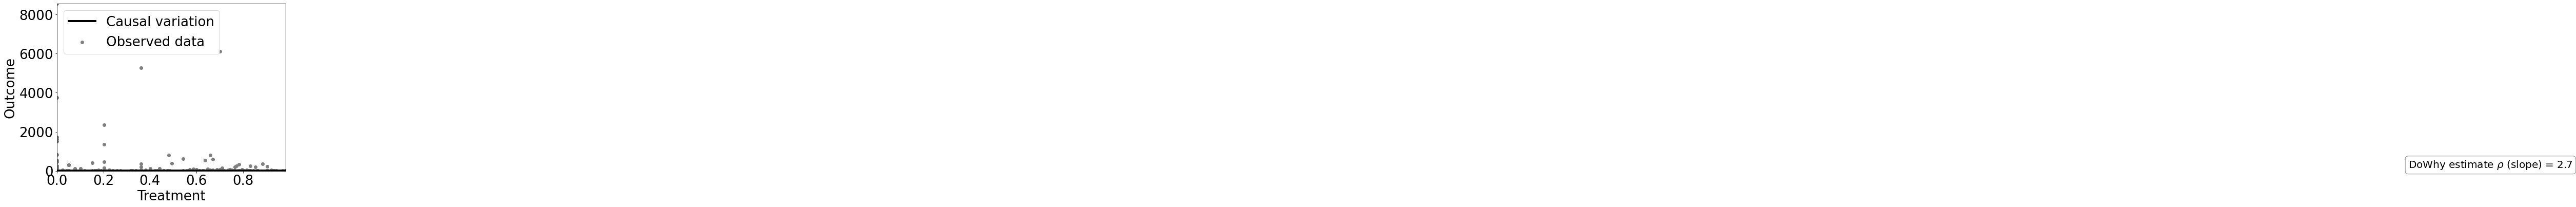

In [ ]:
model_sentiment = CausalModel(
    data=df,
    treatment='sentiment',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_sentiment = model_sentiment.identify_effect()
print(estimands_sentiment)
estimate_sentiment = model_sentiment.estimate_effect(estimands_sentiment,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_sentiment.value))
dowhy.plotter.plot_causal_effect(estimate_sentiment, df['sentiment'], df['RETWEET'])

Here, we are creating a causal model where NN is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of NN on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                    
─────(Expectation(RETWEET|PRP,sentiment,VBD,RB,IN,VBN))
d[NN]                                                  
Estimand assumption 1, Unconfoundedness: If U→{NN} and U→RETWEET then P(RETWEET|NN,PRP,sentiment,VBD,RB,IN,VBN,U) = P(RETWEET|NN,PRP,sentiment,VBD,RB,IN,VBN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [topic])*Derivative([topic], [NN]))
Estimand assumption 1, Full-mediation: topic intercepts (blocks) all directed paths from NN to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{NN} and U→{topic} then P(topic|NN,U) = P(topic|NN)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{topic} and U→RETWEET then P(RETWEET|topic, NN, U) = P(RETWEET|topic, NN)

linear_regression
{'control_v

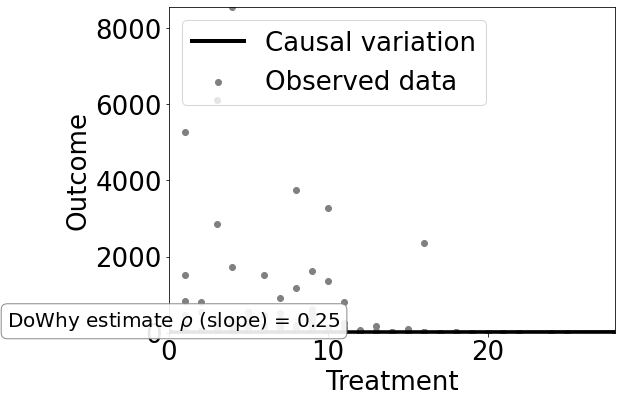

In [ ]:
model_NN = CausalModel(
    data=df,
    treatment='NN',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_NN = model_NN.identify_effect()
print(estimands_NN)
estimate_NN = model_NN.estimate_effect(estimands_NN,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_NN.value))
dowhy.plotter.plot_causal_effect(estimate_NN, df['NN'], df['RETWEET'])

Here, we are creating a causal model where VBN is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of VBN on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                          
──────(Expectation(RETWEET|sentiment,DT,VBG))
d[VBN]                                       
Estimand assumption 1, Unconfoundedness: If U→{VBN} and U→RETWEET then P(RETWEET|VBN,sentiment,DT,VBG,U) = P(RETWEET|VBN,sentiment,DT,VBG)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([num_hashtags], [VB
N]))
Estimand assumption 1, Full-mediation: num_hashtags intercepts (blocks) all directed paths from VBN to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{VBN} and U→{num_hashtags} then P(num_hashtags|VBN,U) = P(num_hashtags|VBN)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags, VBN, U) = P(RETWEET|num_hashtags, VBN)

linear_

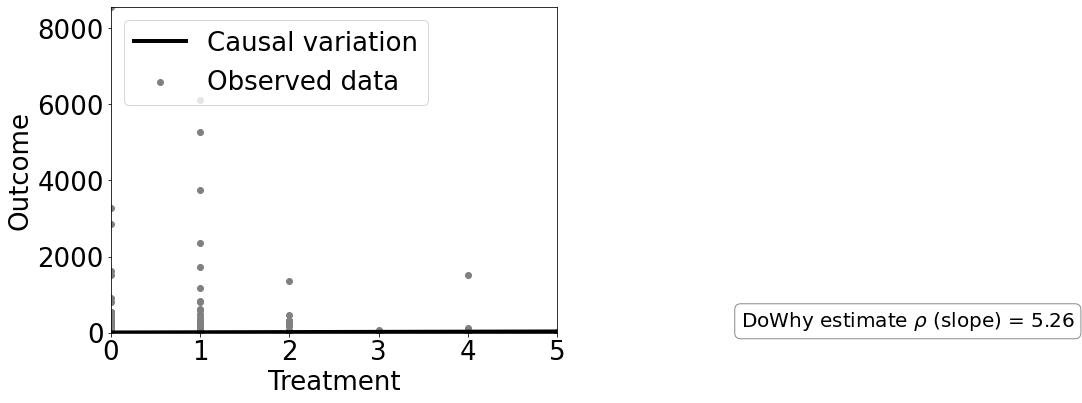

In [ ]:
model_VBN = CausalModel(
    data=df,
    treatment='VBN',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_VBN = model_VBN.identify_effect()
print(estimands_VBN)
estimate_VBN = model_VBN.estimate_effect(estimands_VBN,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_VBN.value))
dowhy.plotter.plot_causal_effect(estimate_VBN, df['VBN'], df['RETWEET'])

Here, we are creating a causal model where the number of links is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the number of links on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(RETWEET|PRP,VBD,NN,RB,IN))
d[numₗᵢₙₖₛ]                                       
Estimand assumption 1, Unconfoundedness: If U→{num_links} and U→RETWEET then P(RETWEET|num_links,PRP,VBD,NN,RB,IN,U) = P(RETWEET|num_links,PRP,VBD,NN,RB,IN)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [topic])*Derivative([topic], [num_links]))
Estimand assumption 1, Full-mediation: topic intercepts (blocks) all directed paths from num_links to R,E,T,W,E,E,T.
Estimand assumption 2, First-stage-unconfoundedness: If U→{num_links} and U→{topic} then P(topic|num_links,U) = P(topic|num_links)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{topic} and U→RETWEET then P(RETWEET|topic, num_links, U) = P(RETWEET|topic, num_link

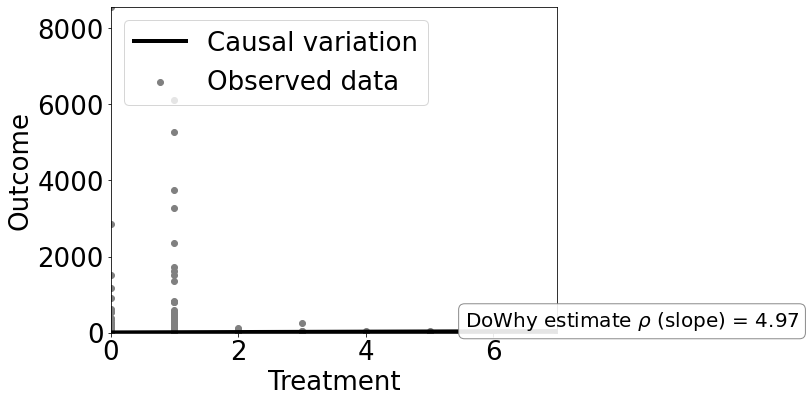

In [ ]:
model_num_links = CausalModel(
    data=df,
    treatment='num_links',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_num_links = model_num_links.identify_effect()
print(estimands_num_links)
estimate_num_links = model_num_links.estimate_effect(estimands_num_links,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_num_links.value))
dowhy.plotter.plot_causal_effect(estimate_num_links, df['num_links'], df['RETWEET'])

Here, we are creating a causal model where the number of hashtags is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the number of hashtags on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                             
───────────────(Expectation(RETWEET))
d[num_hashtags]                      
Estimand assumption 1, Unconfoundedness: If U→{num_hashtags} and U→RETWEET then P(RETWEET|num_hashtags,,U) = P(RETWEET|num_hashtags,)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(RETWEET, [PRP, VBD, NN, VBN, num_links, RB, sentiment])
*Derivative([num_hashtags], [PRP, VBD, NN, VBN, num_links, RB, sentiment])**(-
1))
Estimand assumption 1, As-if-random: If U→→RETWEET then ¬(U →→{PRP,VBD,NN,VBN,num_links,RB,sentiment})
Estimand assumption 2, Exclusion: If we remove {PRP,VBD,NN,VBN,num_links,RB,sentiment}→{num_hashtags}, then ¬({PRP,VBD,NN,VBN,num_links,RB,sentiment}→RETWEET)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [topic])*Derivative([topic], [num_hashtags]))
Estimand assumption 1, Full-media

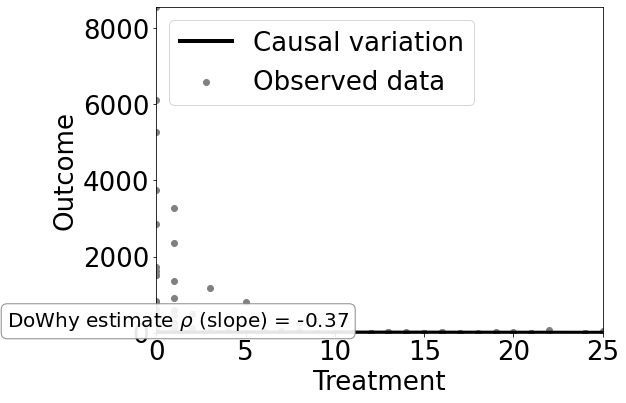

In [ ]:
model_num_hashtag = CausalModel(
    data=df,
    treatment='num_hashtags',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_num_hashtag = model_num_hashtag.identify_effect()
print(estimands_num_hashtag)
estimate_num_hashtag = model_num_hashtag.estimate_effect(estimands_num_hashtag,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_num_hashtag.value))
dowhy.plotter.plot_causal_effect(estimate_num_hashtag, df['num_hashtags'], df['RETWEET'])

Here, we are creating a causal model where the topic of the tweet is the treatment variable and number of retweets is the outcome variable. Using this model we find the effect of the topic of the tweet on the number of retweets for a particular tweet.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                          
────────(Expectation(RETWEET))
d[topic]                      
Estimand assumption 1, Unconfoundedness: If U→{topic} and U→RETWEET then P(RETWEET|topic,,U) = P(RETWEET|topic,)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([topic], [num_hasht
ags])**(-1))
Estimand assumption 1, As-if-random: If U→→RETWEET then ¬(U →→{num_hashtags})
Estimand assumption 2, Exclusion: If we remove {num_hashtags}→{topic}, then ¬({num_hashtags}→RETWEET)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}

Causal Estimate is 0.5350406487286574


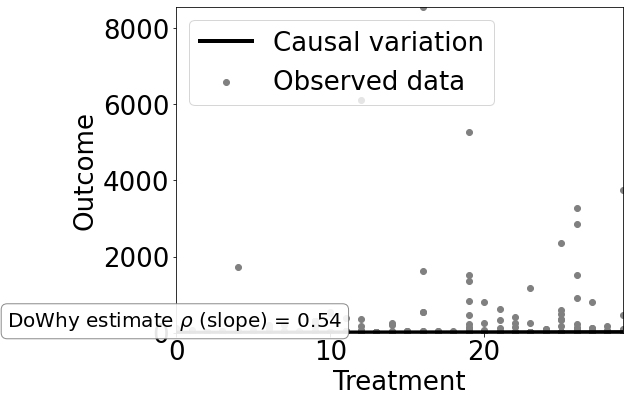

In [ ]:
model_topic = CausalModel(
    data=df,
    treatment='topic',
       outcome = 'RETWEET',
       graph=causal_graph.replace("\n", " "),)
estimands_topic = model_topic.identify_effect()
print(estimands_topic)
estimate_topic = model_topic.estimate_effect(estimands_topic,
        method_name="backdoor.linear_regression")
print("\nCausal Estimate is " + str(estimate_topic.value))
dowhy.plotter.plot_causal_effect(estimate_topic, df['topic'], df['RETWEET'])